<a href="https://colab.research.google.com/github/cristinarod615/IA/blob/main/Proyecto_Final_Obesidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTEGRANTES DEL EQUIPO NUMERO 24

*   Gabriel Jaime Maya Gutiérrez
*   Cristina Rodriguez
*   Jorge Eleazar Bustamante Herrera
*   Juan Sebastián Durango Mora

#***`1. IDENTIFICACIÓN DEL PROBLEMA`***

La obesidad es un problema de salud creciente en Colombia, asociado a múltiples enfermedades crónicas. Su detección temprana es clave para prevenir complicaciones. Actualmente, existen diversos factores relacionados con el estilo de vida que influyen en el desarrollo de esta condición, como la alimentación, la actividad física y el uso de tecnología.

Este proyecto busca abordar el problema de la obesidad mediante la clasificación del nivel de obesidad en personas, utilizando un conjunto de datos que incluye variables sobre hábitos alimenticios, condición física y estilo de vida. El objetivo es desarrollar un modelo predictivo que permita identificar el nivel de obesidad y apoyar la toma de decisiones en salud preventiva.

#***`2. RECOLECCIÓN DE DATOS`***

#Conectar con Google Drive

In [ ]:
# Montar Google Drive para acceder a archivos desde Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Instalar librerias iniciales

In [ ]:
pip install numpy pandas

#***`3. LIMPIEZA DE LOS DATOS`***

#Convertir la base de datos en un DataFrame

In [ ]:
# Importar numpy y pandas para manejo de datos
import numpy as np
import pandas as pd

# Leer CSV desde Google Drive, ignorando líneas con errores y con codificación latin-1
df = pd.read_csv("/content/drive/MyDrive/Obesity prediction.csv", sep=',', on_bad_lines='skip', encoding='latin-1')

# Mostrar el DataFrame completo
print(df)

      Gender        Age    Height      Weight family_history FAVC  FCVC  NCP  \
0     Female  21.000000  1.620000   64.000000            yes   no   2.0  3.0   
1     Female  21.000000  1.520000   56.000000            yes   no   3.0  3.0   
2       Male  23.000000  1.800000   77.000000            yes   no   2.0  3.0   
3       Male  27.000000  1.800000   87.000000             no   no   3.0  3.0   
4       Male  22.000000  1.780000   89.800000             no   no   2.0  1.0   
...      ...        ...       ...         ...            ...  ...   ...  ...   
2106  Female  20.976842  1.710730  131.408528            yes  yes   3.0  3.0   
2107  Female  21.982942  1.748584  133.742943            yes  yes   3.0  3.0   
2108  Female  22.524036  1.752206  133.689352            yes  yes   3.0  3.0   
2109  Female  24.361936  1.739450  133.346641            yes  yes   3.0  3.0   
2110  Female  23.664709  1.738836  133.472641            yes  yes   3.0  3.0   

           CAEC SMOKE      CH2O  SCC   

In [ ]:
# Genera un resumen estadístico de las columnas numéricas del DataFrame 'df',
# incluyendo métricas como conteo, media, desviación estándar, valores mínimo y máximo,
# así como los percentiles (25%, 50% y 75%).
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Mostrar resumen de la estructura del DataFrame (tipos de datos, no nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

#Renombrar, transformar, redondear y convertir datos

In [ ]:
# Renombrar columnas de inglés a español
df.rename(columns={'Gender': 'Genero'}, inplace=True)
df.rename(columns={'Age': 'Edad'}, inplace=True)
df.rename(columns={'Height': 'Altura'}, inplace=True)
df.rename(columns={'Weight': 'Peso'}, inplace=True)
df.rename(columns={'family_history': 'Historial_sobrepeso'}, inplace=True)
df.rename(columns={'FAVC': 'Consumo_calorias_altas'}, inplace=True)
df.rename(columns={'FCVC': 'Consumo_verduras'}, inplace=True)
df.rename(columns={'NCP': 'Numero_comidas_principales'}, inplace=True)
df.rename(columns={'CAEC': 'Consumo_entre_comidas'}, inplace=True)
df.rename(columns={'CH2O': 'Consumo_agua_diario'}, inplace=True)
df.rename(columns={'SCC': 'Control_calorias_diarias'}, inplace=True)
df.rename(columns={'FAF': 'Frecuencia_actividad_fisica'}, inplace=True)
df.rename(columns={'TUE': 'Tiempo_uso_tecnologia'}, inplace=True)
df.rename(columns={'CALC': 'Frecuencia_consumo_alcohol'}, inplace=True)
df.rename(columns={'MTRANS': 'Medio_transporte_habitual'}, inplace=True)
df.rename(columns={'Obesity': 'Obesidad'}, inplace=True)
df.rename(columns={'SMOKE': 'Fuma'}, inplace=True)

# Convertir algunas columnas de float a int
df['Edad'] = df['Edad'].astype(int)
df['Consumo_verduras'] = df['Consumo_verduras'].astype(int)
df['Numero_comidas_principales'] = df['Numero_comidas_principales'].astype(int)

# Redondear columnas numéricas a 2 decimales
df['Altura'] = df['Altura'].round(2)
df['Peso'] = df['Peso'].round(2)
df['Frecuencia_actividad_fisica'] = df['Frecuencia_actividad_fisica'].round(2)
df['Tiempo_uso_tecnologia'] = df['Tiempo_uso_tecnologia'].round(2)
df['Consumo_agua_diario'] = df['Consumo_agua_diario'].round(2)

# Traducir valores categóricos de inglés a español
df['Genero'] = df['Genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['Historial_sobrepeso'] = df['Historial_sobrepeso'].replace({'yes': 'Si', 'no': 'No'})
df['Consumo_calorias_altas'] = df['Consumo_calorias_altas'].replace({'yes': 'Si', 'no': 'No'})
df['Fuma'] = df['Fuma'].replace({'yes': 'Si', 'no': 'No'})
df['Frecuencia_consumo_alcohol'] = df['Frecuencia_consumo_alcohol'].replace({'no': 'No','Sometimes': 'Raramente', 'Frequently': 'Frecuentemente', 'Always': 'Siempre'})
df['Control_calorias_diarias'] = df['Control_calorias_diarias'].replace({'yes': 'Si', 'no': 'No'})
df['Consumo_entre_comidas'] = df['Consumo_entre_comidas'].replace({'no': 'No','Sometimes': 'Raramente', 'Frequently': 'Frecuentemente', 'Always': 'Siempre'})
df['Medio_transporte_habitual'] = df['Medio_transporte_habitual'].replace({'Public_Transportation': 'Transporte público', 'Walking': 'Caminar', 'Automobile': 'Automóvil', 'Motorbike': 'Motocicleta', 'Bike': 'Bicicleta'})
df['Obesidad'] = df['Obesidad'].replace({
    'Normal_Weight': 'Peso Normal',
    'Overweight_Level_I': 'Sobrepeso Nivel I',
    'Overweight_Level_II': 'Sobrepeso Nivel II',
    'Obesity_Type_I': 'Obesidad Tipo I',
    'Obesity_Type_II': 'Obesidad Tipo II',
    'Obesity_Type_III': 'Obesidad Tipo III',
    'Insufficient_Weight': 'Peso Insuficiente'
})

# Mostrar DataFrame actualizado
print(df)

         Genero  Edad  Altura    Peso Historial_sobrepeso  \
0      Femenino    21    1.62   64.00                  Si   
1      Femenino    21    1.52   56.00                  Si   
2     Masculino    23    1.80   77.00                  Si   
3     Masculino    27    1.80   87.00                  No   
4     Masculino    22    1.78   89.80                  No   
...         ...   ...     ...     ...                 ...   
2106   Femenino    20    1.71  131.41                  Si   
2107   Femenino    21    1.75  133.74                  Si   
2108   Femenino    22    1.75  133.69                  Si   
2109   Femenino    24    1.74  133.35                  Si   
2110   Femenino    23    1.74  133.47                  Si   

     Consumo_calorias_altas  Consumo_verduras  Numero_comidas_principales  \
0                        No                 2                           3   
1                        No                 3                           3   
2                        No         

#Eliminar columnas innecesarias para el modelo

In [ ]:
# Eliminar columnas no necesarias
df = df.drop(['Consumo_entre_comidas', 'Control_calorias_diarias'], axis=1)

# Verificar cambios mostrando las primeras filas
print(df.head())

      Genero  Edad  Altura  Peso Historial_sobrepeso Consumo_calorias_altas  \
0   Femenino    21    1.62  64.0                  Si                     No   
1   Femenino    21    1.52  56.0                  Si                     No   
2  Masculino    23    1.80  77.0                  Si                     No   
3  Masculino    27    1.80  87.0                  No                     No   
4  Masculino    22    1.78  89.8                  No                     No   

   Consumo_verduras  Numero_comidas_principales Fuma  Consumo_agua_diario  \
0                 2                           3   No                  2.0   
1                 3                           3   Si                  3.0   
2                 2                           3   No                  2.0   
3                 3                           3   No                  2.0   
4                 2                           1   No                  2.0   

   Frecuencia_actividad_fisica  Tiempo_uso_tecnologia  \
0    

#***`4. GRÁFICAS`***

# Instalación de librerías para visualización

In [ ]:
# Instalar librerías para visualización
!pip install matplotlib seaborn

#Gráfica 1: Diagrama de dispersión Peso vs Altura por Nivel de Obesidad

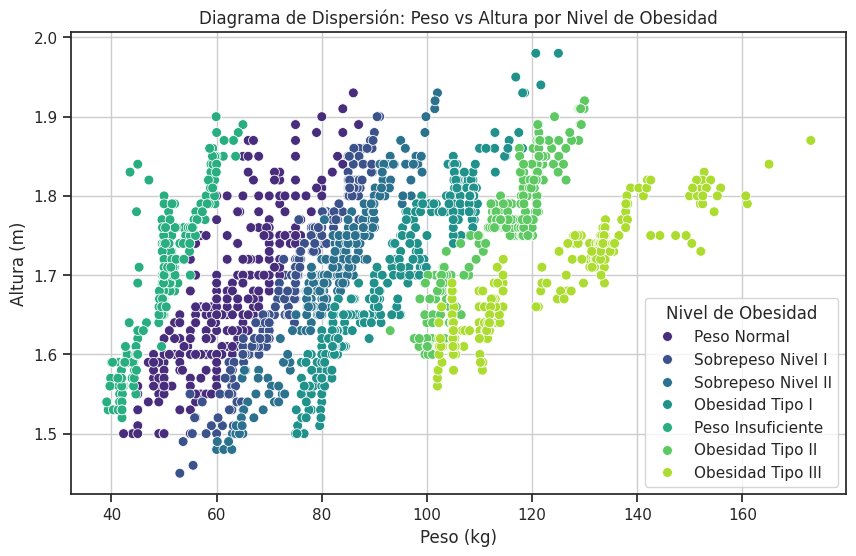

In [ ]:
# Importar librerías de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar diagrama de dispersión de Peso vs Altura, coloreado por nivel de obesidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Peso', y='Altura', hue='Obesidad', palette='viridis', s=50)
plt.title('Diagrama de Dispersión: Peso vs Altura por Nivel de Obesidad')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.legend(title='Nivel de Obesidad')
plt.grid(True)
plt.show()

#Gráfica 2: Diagrama de dispersión Tiempo Uso Tecnologia vs Medio de Transporte Habitual

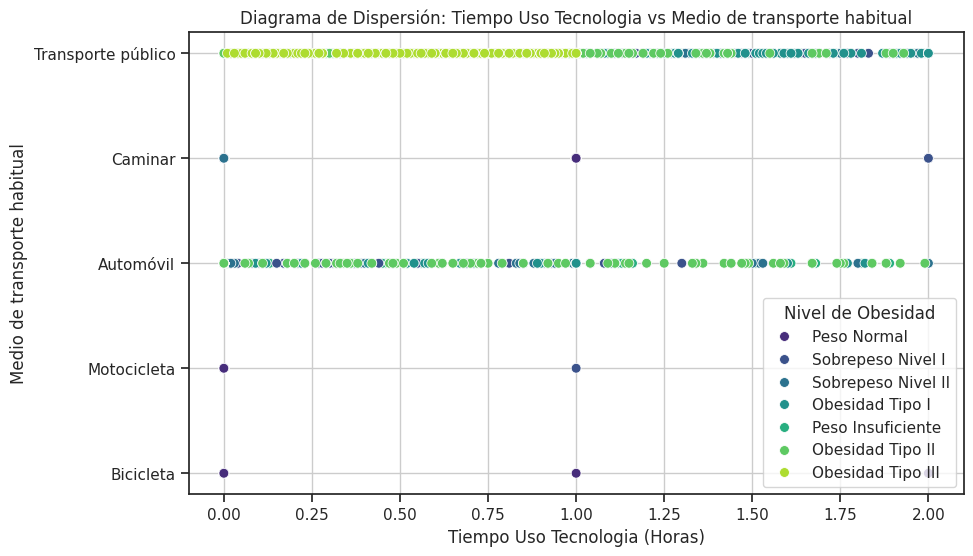

In [ ]:
# Graficar diagrama de dispersión de Tiempo de Uso de Tecnología vs Medio de transporte, por nivel de obesidad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tiempo_uso_tecnologia', y='Medio_transporte_habitual', hue='Obesidad', palette='viridis', s=50)
plt.title('Diagrama de Dispersión: Tiempo Uso Tecnologia vs Medio de transporte habitual')
plt.xlabel('Tiempo Uso Tecnologia (Horas)')
plt.ylabel('Medio de transporte habitual')
plt.legend(title='Nivel de Obesidad')
plt.grid(True)
plt.show()

#Gráfica 3: Histograma de Edad vs Nivel de Obesidad


/tmp/ipython-input-66-262118023.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Nivel de Obesidad')


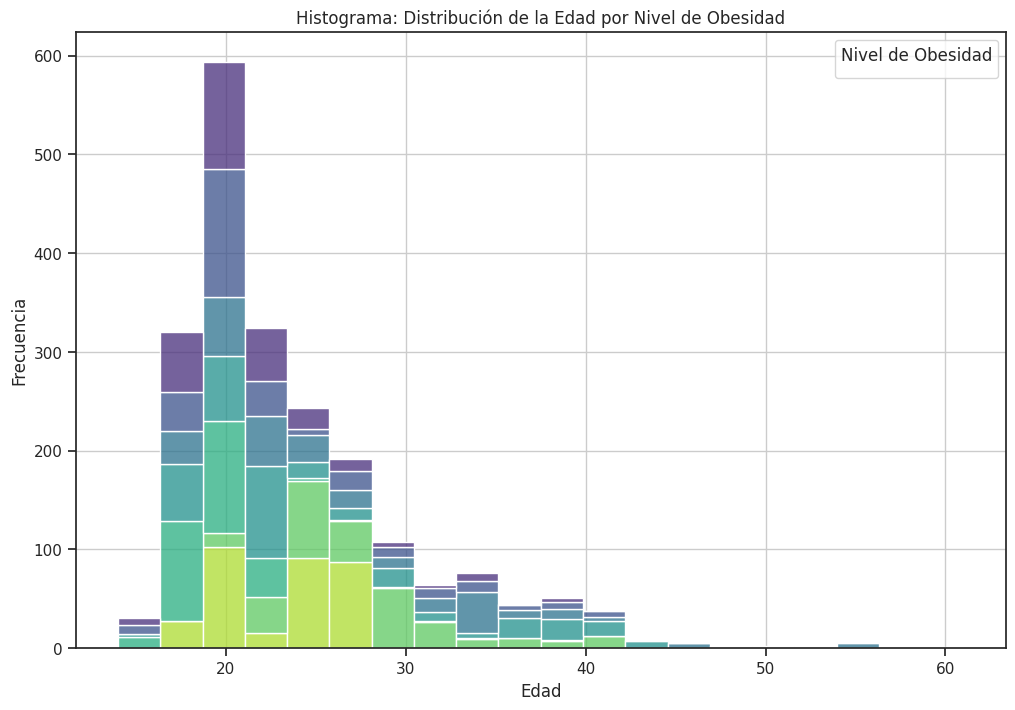

In [ ]:
# Histograma de distribución de Edad por nivel de obesidad
plt.figure(figsize=(12, 8))

sns.histplot(data=df, x='Edad', hue='Obesidad', multiple='stack', palette='viridis', bins=20)
plt.title('Histograma: Distribución de la Edad por Nivel de Obesidad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Nivel de Obesidad')
plt.grid(True)
plt.show()

#Gráfica 4: Diagrama de relaciones múltiples

<Figure size 1200x1000 with 0 Axes>

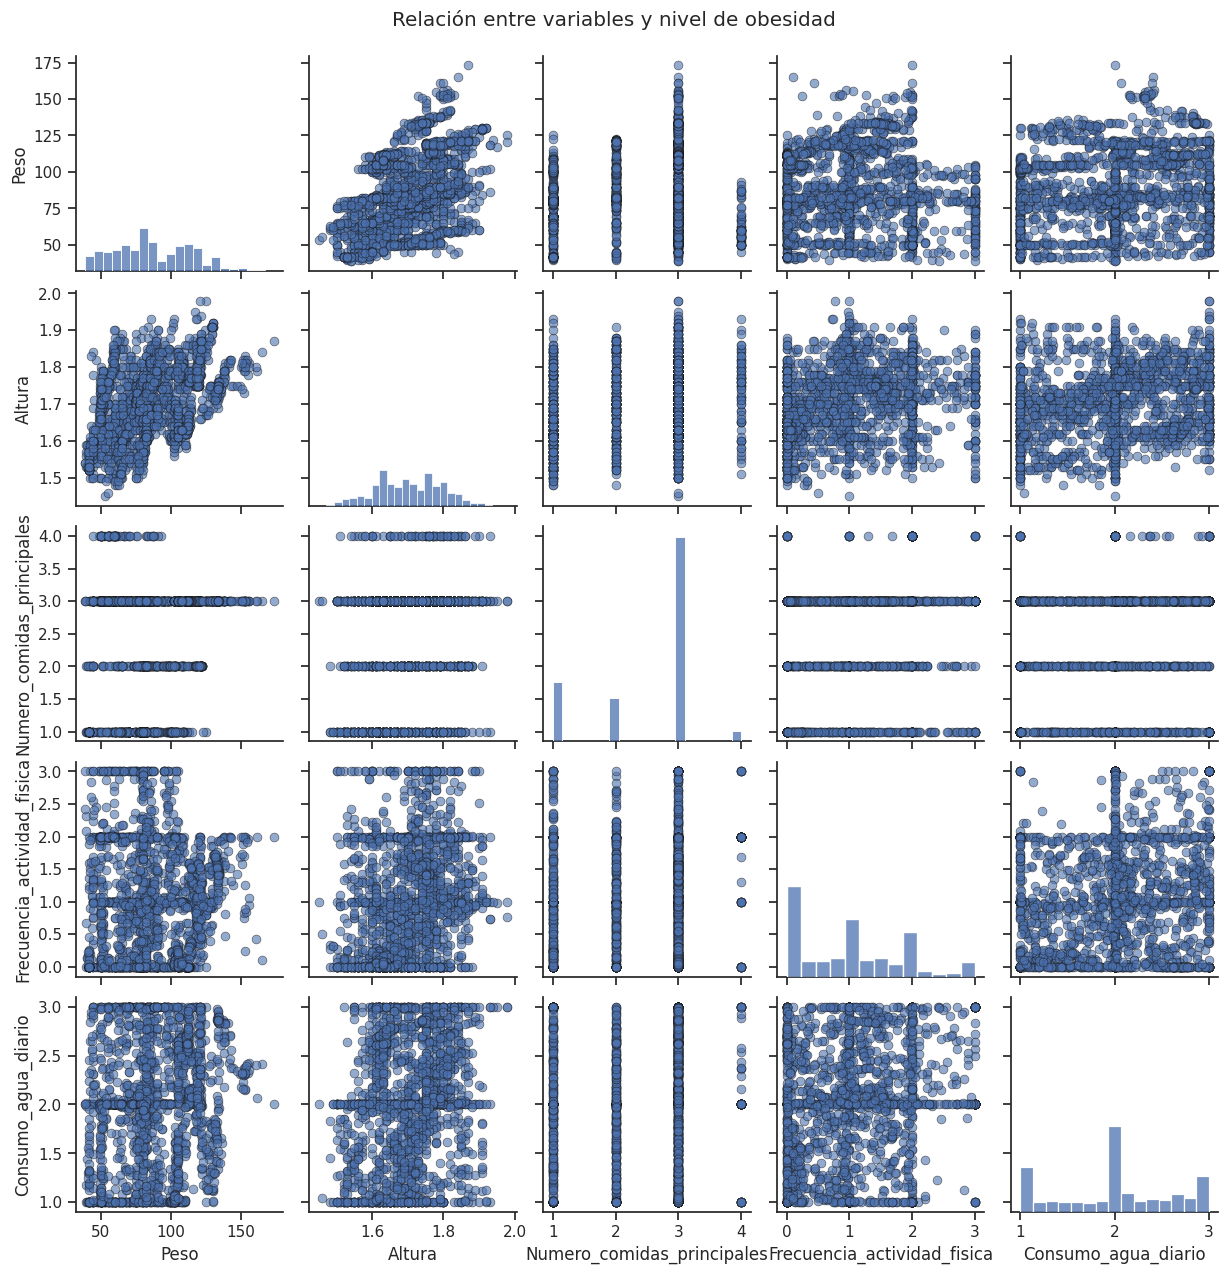

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas para análisis
variables = df[['Peso', 'Altura', 'Numero_comidas_principales', 'Frecuencia_actividad_fisica', 'Consumo_agua_diario']]

# Configurar estilo gráfico
sns.set(style="ticks")

# Crear pairplot para visualizar relaciones entre variables
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(variables, diag_kind="hist", plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"})
pairplot.fig.suptitle("Relación entre variables y nivel de obesidad", y=1.02)
plt.show()

#Gráfica 5: Mapa de calor

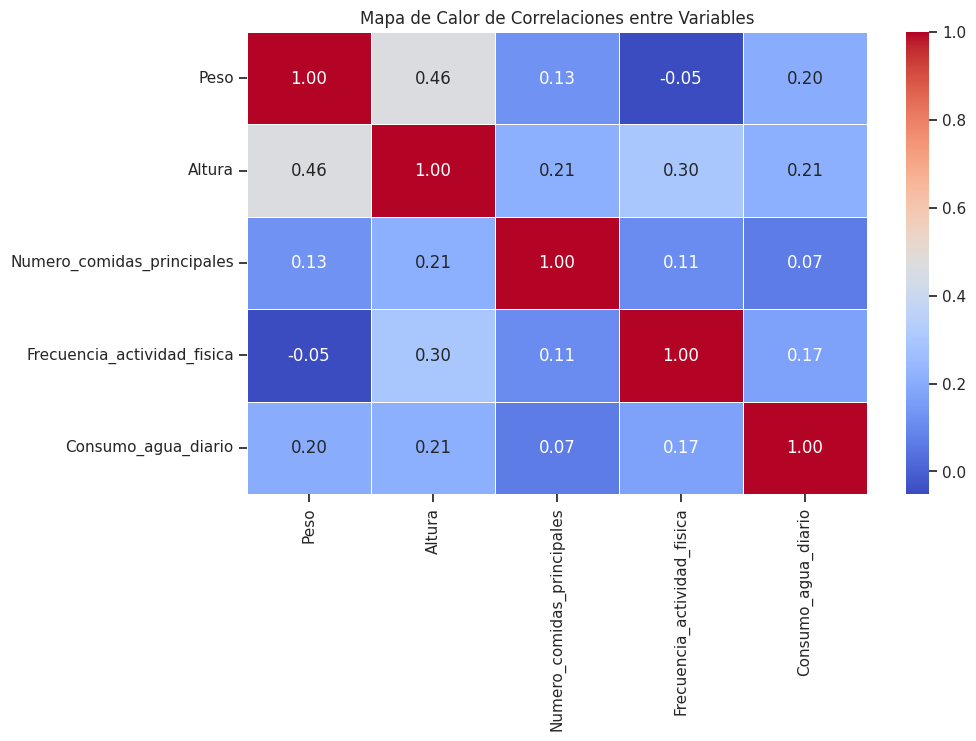

In [ ]:
# Calcular matriz de correlación entre variables seleccionadas
correlation_matrix = variables.corr()

# Graficar mapa de calor para visualizar correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.show()

#Gráfica 6: Diagrama de dispersión Edad vs Consumo Diario de Agua

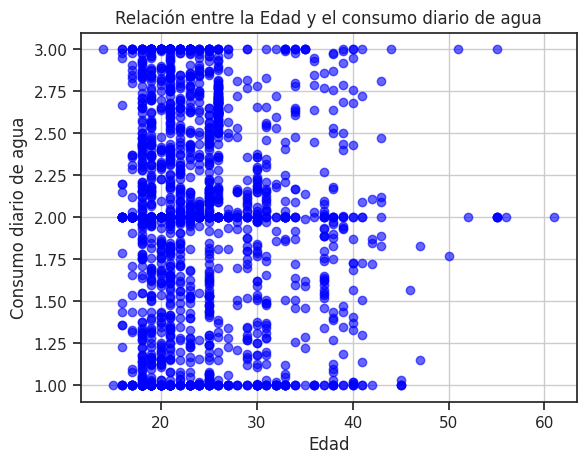

In [ ]:
# Desactivar notación científica en el eje Y
plt.ticklabel_format(style='plain', axis='y')

# Graficar dispersión Edad vs Consumo diario de agua
plt.scatter(df['Edad'], df['Consumo_agua_diario'], color='blue', alpha=0.6)

# Etiquetas y título del gráfico
plt.xlabel('Edad')
plt.ylabel('Consumo diario de agua')
plt.title('Relación entre la Edad y el consumo diario de agua')

# Mostrar cuadrícula y gráfico
plt.grid(True)
plt.show()

#Gráfica 7: Diagrama de dispersión Frecuencia de Actividad Física vs Nivel de Obesidad

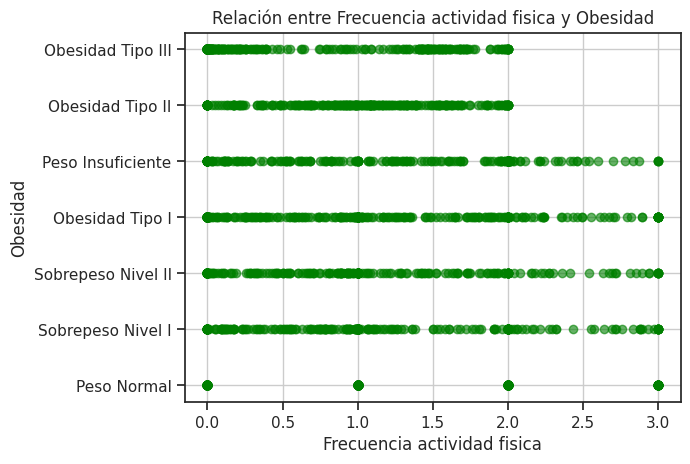

In [ ]:
# Desactivar notación científica en eje Y
plt.ticklabel_format(style='plain', axis='y')

# Graficar dispersión Frecuencia actividad física vs Obesidad
plt.scatter(df['Frecuencia_actividad_fisica'], df['Obesidad'], color='green', alpha=0.6)

# Etiquetas y título
plt.xlabel('Frecuencia actividad fisica')
plt.ylabel('Obesidad')
plt.title('Relación entre Frecuencia actividad fisica y Obesidad')

# Mostrar cuadrícula y gráfico
plt.grid(True)
plt.show()

#Gráfica 8: Diagrama de dispersión Nivel de Obesidad vs Altura

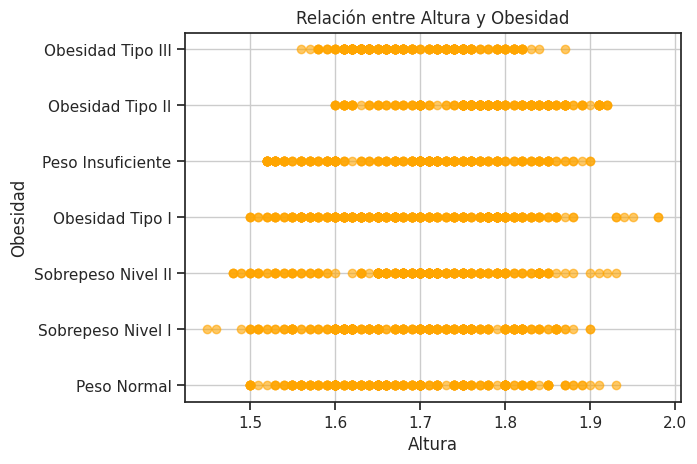

In [ ]:
# Desactivar notación científica en eje Y
plt.ticklabel_format(style='plain', axis='y')

# Graficar dispersión Altura vs Obesidad
plt.scatter(df['Altura'], df['Obesidad'], color='orange', alpha=0.6)

# Etiquetas y título del gráfico
plt.xlabel('Altura')
plt.ylabel('Obesidad')
plt.title('Relación entre Altura y Obesidad')

# Mostrar cuadrícula y gráfico
plt.grid(True)
plt.show()

#Gráfica 9: Diagrama de dispersión Edad vs Peso

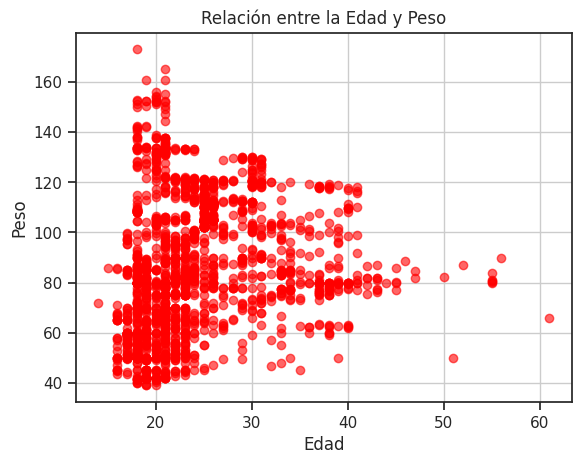

In [ ]:
# Desactivar notación científica en eje Y
plt.ticklabel_format(style='plain', axis='y')

# Graficar dispersión Edad vs Peso
plt.scatter(df['Edad'], df['Peso'], color='red', alpha=0.6)

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Peso')
plt.title('Relación entre la Edad y Peso')

# Mostrar cuadrícula y gráfico
plt.grid(True)
plt.show()

#Gráfica 10: Relación entre variables predictorias vs Nivel de Obesidad

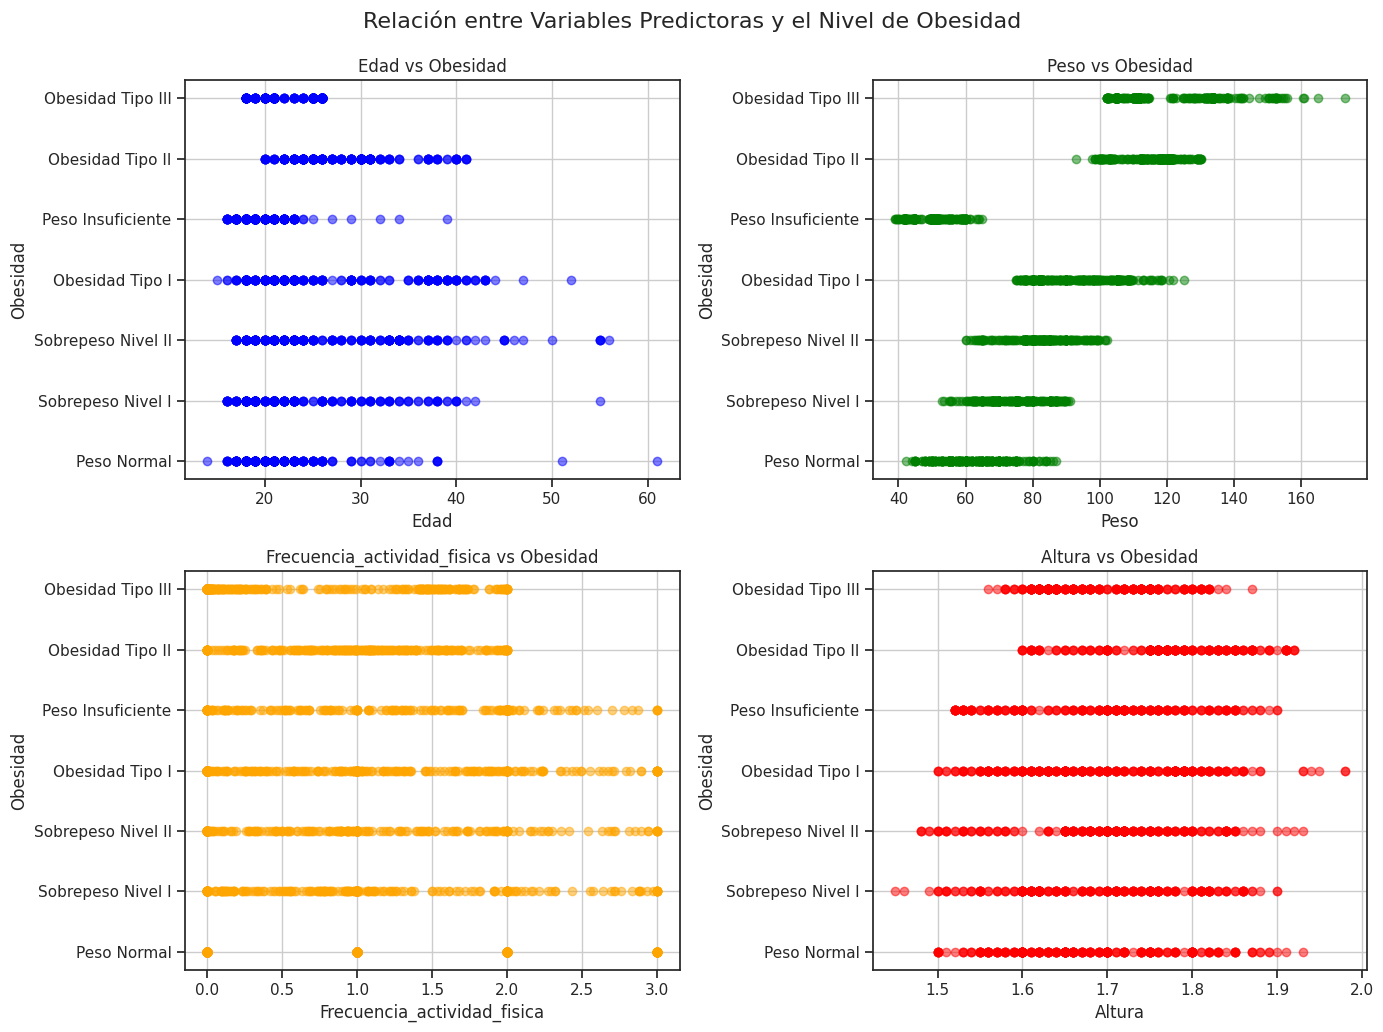

In [ ]:
import matplotlib.pyplot as plt

# Variables y colores para comparar
variables = ['Edad', 'Peso', 'Frecuencia_actividad_fisica', 'Altura']
colores = ['blue', 'green', 'orange', 'red']

# Crear figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Facilita iterar sobre subplots

# Desactivar notación científica en eje Y
plt.ticklabel_format(style='plain', axis='y')

# Graficar dispersión de cada variable contra Obesidad
for i, var in enumerate(variables):
    axs[i].scatter(df[var], df['Obesidad'], color=colores[i], alpha=0.5)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Obesidad')
    axs[i].set_title(f'{var} vs Obesidad')
    axs[i].grid(True)

# Ajustar layout y título general
plt.tight_layout()
plt.suptitle('Relación entre Variables Predictoras y el Nivel de Obesidad', fontsize=16, y=1.03)
plt.show()

#***`5. CATEGORIZAMOS VARIABLES PREDICTORIAS (X)`***

#Categorizamos "Género"

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Copiar DataFrame original para trabajar con seguridad
df_categ = df.copy()

# Codificar variable categórica 'Genero' usando OneHotEncoder
encoder_genero = OneHotEncoder(sparse_output=False)
genero_encoded = encoder_genero.fit_transform(df_categ[['Genero']])

# Crear DataFrame con las columnas codificadas
genero_df = pd.DataFrame(genero_encoded, columns=encoder_genero.get_feature_names_out(['Genero']))

# Reemplazar columna original por las columnas codificadas
df_categ = df_categ.drop('Genero', axis=1)
df_categ = pd.concat([df_categ.reset_index(drop=True), genero_df.reset_index(drop=True)], axis=1)

# Mostrar resultado de la codificación
print("\n✅ Genero codificado:")
print(genero_df.head(10))


✅ Genero codificado:
   Genero_Femenino  Genero_Masculino
0              1.0               0.0
1              1.0               0.0
2              0.0               1.0
3              0.0               1.0
4              0.0               1.0
5              0.0               1.0
6              1.0               0.0
7              0.0               1.0
8              0.0               1.0
9              0.0               1.0


#Categorizamos "Historial_sobrepeso", "Consumo_calorias_altas" y "Fuma"

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definir variables binarias y su orden para codificación ordinal
binarias = {
    'Historial_sobrepeso': ['No', 'Si'],
    'Consumo_calorias_altas': ['No', 'Si'],
    'Fuma': ['No', 'Si']
}

# Codificar cada variable binaria con OrdinalEncoder, sobrescribiendo la columna original
for col, orden in binarias.items():
    oe = OrdinalEncoder(categories=[orden])
    df_categ[col] = oe.fit_transform(df_categ[[col]])
    print(f"\n✅ {col} codificada:")
    print(df_categ[[col]].head(10))



✅ Historial_sobrepeso codificada:
   Historial_sobrepeso
0                  1.0
1                  1.0
2                  1.0
3                  0.0
4                  0.0
5                  0.0
6                  1.0
7                  0.0
8                  1.0
9                  1.0

✅ Consumo_calorias_altas codificada:
   Consumo_calorias_altas
0                     0.0
1                     0.0
2                     0.0
3                     0.0
4                     0.0
5                     1.0
6                     1.0
7                     0.0
8                     1.0
9                     1.0

✅ Fuma codificada:
   Fuma
0   0.0
1   1.0
2   0.0
3   0.0
4   0.0
5   0.0
6   0.0
7   0.0
8   0.0
9   0.0


#Categorizamos "Frecuencia Consumo Alcohol"

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definir orden para variable ordinal 'Frecuencia_consumo_alcohol'
alcohol_orden = [['No', 'Raramente', 'Frecuentemente', 'Siempre']]

# Codificar con OrdinalEncoder sobrescribiendo la columna original
oe_alcohol = OrdinalEncoder(categories=alcohol_orden)
df_categ['Frecuencia_consumo_alcohol'] = oe_alcohol.fit_transform(df_categ[['Frecuencia_consumo_alcohol']])

# Mostrar resultado de codificación
print("\n✅ Frecuencia_consumo_alcohol codificada:")
print(df_categ[['Frecuencia_consumo_alcohol']].head(10))


✅ Frecuencia_consumo_alcohol codificada:
   Frecuencia_consumo_alcohol
0                         0.0
1                         1.0
2                         2.0
3                         2.0
4                         1.0
5                         1.0
6                         1.0
7                         1.0
8                         2.0
9                         0.0


#Categorizamos "Medio Transporte Habitual"

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definir orden para variable ordinal 'Medio_transporte_habitual'
transporte_orden = [['Caminar', 'Bicicleta', 'Motocicleta', 'Transporte público', 'Automóvil']]

# Codificar con OrdinalEncoder sobrescribiendo la columna original
oe_transporte = OrdinalEncoder(categories=transporte_orden)
df_categ['Medio_transporte_habitual'] = oe_transporte.fit_transform(df_categ[['Medio_transporte_habitual']])

# Mostrar resultado de codificación
print("\n✅ Medio_transporte_habitual codificado:")
print(df_categ[['Medio_transporte_habitual']].head(10))


✅ Medio_transporte_habitual codificado:
   Medio_transporte_habitual
0                        3.0
1                        3.0
2                        3.0
3                        0.0
4                        3.0
5                        4.0
6                        2.0
7                        3.0
8                        3.0
9                        3.0


#***`6. CATEGORIZAMOS VARIABLE OBJETIVO (Y)`***

#Categorizamos el campo "Nivel de Obesidad"

In [ ]:
# Codificar variable ordinal 'Obesidad' si está en formato texto
if df_categ['Obesidad'].dtype == 'object':
    # Limpiar espacios y pasar a formato consistente
    df_categ['Obesidad'] = df_categ['Obesidad'].str.strip()

    obesidad_mapping = {
        'Peso Insuficiente': 0,
        'Peso Normal': 1,
        'Sobrepeso Nivel I': 2,
        'Sobrepeso Nivel II': 3,
        'Obesidad Tipo I': 4,
        'Obesidad Tipo II': 5,
        'Obesidad Tipo III': 6
    }
    df_categ['Obesidad'] = df_categ['Obesidad'].map(obesidad_mapping)

    # Mostrar resultado de codificación
    print("\n✅ Obesidad codificada:")
    print(df_categ['Obesidad'].head(10))


✅ Obesidad codificada:
0    1
1    1
2    1
3    2
4    3
5    1
6    1
7    1
8    1
9    1
Name: Obesidad, dtype: int64


# Actualizar el DataFrame original y mostrar tipos de datos

In [ ]:
# Copiar DataFrame codificado para seguir trabajando
df = df_categ.copy()

# Mostrar los tipos de datos de cada columna para verificar
print(df.dtypes)

Edad                             int64
Altura                         float64
Peso                           float64
Historial_sobrepeso            float64
Consumo_calorias_altas         float64
Consumo_verduras                 int64
Numero_comidas_principales       int64
Fuma                           float64
Consumo_agua_diario            float64
Frecuencia_actividad_fisica    float64
Tiempo_uso_tecnologia          float64
Frecuencia_consumo_alcohol     float64
Medio_transporte_habitual      float64
Obesidad                         int64
Genero_Femenino                float64
Genero_Masculino               float64
dtype: object


#***`7. INGENIERIA DE MODELOS: REGRESIÓN LINEAL MULTIVARIABLE`***

#Importamos las librerías

In [ ]:
# 1. Importar librerías para regresión lineal y división de datos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Variables predictorias (x) variable objetivo (y)

***X representa las variables que usamos para predecir, es decir, lo que el modelo necesita mirar para hacer su cálculo. En este caso:***
  
1.   ¿Cuál es tu género?
2.   ¿Cuál es tu edad?
3.   ¿Cuál es tu altura en metros?
4.   ¿Cuál es tu peso en kilogramos?
5.   ¿Tienes historial de sobrepeso en la familia?
6.   ¿Cuántas porciones de verduras consumes al día?
7.   ¿Cuántas comidas principales haces al día?
8.   ¿Fumas?
9.   ¿Cuántos litros de agua consumes al día?
10.   ¿Cuántas horas dedicas a actividad física diaria?
11.   ¿Cuántas horas usas tecnología al día?
12.   ¿Con qué frecuencia consumes alcohol?
13.   ¿Cuál es tu medio de transporte habitual?
14.   ¿Consumes alimentos con altas calorías?

***Y en la respuesta que queremos predecir:***

15.   Qué tipo de obesidad tienes
----
Piensa en X como las preguntas, e y como la respuesta correcta que el modelo debe aprender a adivinar.

In [ ]:
# 2. Definir variables predictoras (X) y variable objetivo (y)
X = df.drop('Obesidad', axis=1)
y = df['Obesidad']

#Distribución de Datos: 70% para Entrenamiento, 30% para Prueba

Aquí dividimos nuestros datos en dos grupos:

*   X_train y Y_train: se utilizan para entrenar el modelo, es decir, para que aprenda la relación entre las variables y el tipo de obesidad.
*   X_test y Y_test: se usan para evaluar qué tan bien el modelo aprendió, probando su capacidad de predecir con datos nuevos.
*   El parámetro test_size=0.3 indica que el 30% de los datos se reserva para la prueba, mientras que el 70% restante se usa para el entrenamiento.
*   El parámetro random_state=42 garantiza que los resultados sean reproducibles, es decir, que obtengas la misma división de datos cada vez que ejecutes el código.
---
Imagina que tenemos 100 personas en el estudio: le damos 70 para que el modelo aprenda sus hábitos y obesidad, y luego probamos con las 30 restantes para ver qué tan bien funciona la predicción.

In [ ]:
# 3. Separar datos en entrenamiento (70%) y prueba (30%) con random_state para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Modelo de Regresión Lineal Multivariable (Aprendizaje Supervisado)
1. Aquí estamos creando el modelo matemático que vamos a usar. Se llama modelo de regresión lineal múltiple, porque usa varias variables para hacer su predicción.

2. La palabra "modelo" es como un robot que todavía no ha aprendido nada, pero está listo para aprender con datos.

In [ ]:
# 4. Inicializar el modelo de regresión lineal
modelo = LinearRegression()

#Proceso de Entrenamiento del Modelo

En esta etapa, el modelo entrena utilizando los datos de entrenamiento. Aprende a identificar cómo variables como el género, edad, altura, peso, hábitos alimenticios, consumo de agua, actividad física, uso de tecnología, consumo de alcohol y medio de transporte habitual se relacionan con el nivel y tipo de obesidad.

En otras palabras, el modelo empieza a comprender cómo las características y comportamientos del estilo de vida influyen en la clasificación de la obesidad, permitiendo predecir el tipo de obesidad según estos factores.

In [ ]:
# 5. Revisar tipos de datos en X_train para asegurar que no haya variables con texto (string)
X_train.dtypes

,0
Edad,int64
Altura,float64
Peso,float64
Historial_sobrepeso,float64
Consumo_calorias_altas,float64
Consumo_verduras,int64
Numero_comidas_principales,int64
Fuma,float64
Consumo_agua_diario,float64
Frecuencia_actividad_fisica,float64


In [ ]:
# 6. Verificar los valores únicos en la variable objetivo 'Obesidad' para confirmar su correcta codificación
df['Obesidad'].unique()

array([1, 2, 3, 4, 0, 5, 6])

In [ ]:
# 7. Entrenar el modelo usando los datos de entrenamiento para que aprenda las relaciones entre variables predictoras y la variable objetivo
modelo.fit(X_train, y_train)

LinearRegression()

#Fase de Prueba del Modelo

*   Una vez entrenado, utilizamos el modelo para predecir el tipo de obesidad de las personas del grupo de prueba.
*   y_pred representa las predicciones del modelo (es decir, el tipo de obesidad que cree que corresponde a cada persona según sus hábitos y características).

---

En esta etapa, el modelo ya "aprendió" a partir de los datos de entrenamiento, y ahora lo evaluamos para ver qué tan bien entendió la relación entre los hábitos saludables y el tipo de obesidad.

In [ ]:
# 8. Predecimos el nivel de obesidad usando los datos de prueba
y_pred = modelo.predict(X_test)
print(y_pred)

[-5.71747119e-02  5.78468013e+00 -2.45293390e-01  6.87005965e-01
  1.79498409e+00  4.21356604e-02  4.91998191e+00  2.48975681e+00
  3.64617646e+00  3.10131309e-01  3.75675247e+00  6.36568928e+00
  4.38237544e+00  5.33851469e+00  5.45493618e+00  3.17410873e+00
  6.33031186e+00  4.67912857e+00  4.07804242e+00  2.92510159e+00
  3.82552332e+00  2.09475507e+00  5.20243595e+00  4.21969195e+00
  5.74606692e-01  2.93339161e+00  2.67321297e+00  7.17378718e+00
  5.40448267e+00  1.46722275e-01  5.55259995e+00  2.42340317e+00
  2.76903254e+00  1.24359443e+00  1.49814655e-01  5.44854252e+00
  4.20457341e+00  8.28393390e-01  1.77681179e+00  1.22399992e+00
  9.25082156e-01  4.88550434e+00  1.27634200e+00  6.18293753e-01
  1.93070581e+00  1.72994398e-01  4.71975831e+00  1.76660439e+00
  3.64677783e+00  4.84747412e+00  1.63104793e+00  9.98128683e-01
  1.20924137e+00  2.15437889e+00  9.52184806e-03  2.54178324e+00
  5.45224458e+00  4.71967409e+00  2.00234882e+00  5.23354943e+00
  7.03956497e-01  5.98744

#Pipeline con regresión lineal

In [ ]:
# 9. Crear pipeline con regresión lineal
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model_pipeline_dt = Pipeline([
    ('modelo', LinearRegression())
])

# Entrenar el pipeline con los datos procesados
model_pipeline_dt.fit(X_train, y_train)

# Nota: antes de predecir con inputs nuevos, debes transformar manualmente
# las respuestas del usuario a valores numéricos, igual que en el dataset original.

Pipeline(steps=[('modelo', LinearRegression())])

# ***`8. VISUALIZACIÓN DE RESULTADOS: REGRESIÓN LINEAL MULTIVARIABLE`***

In [ ]:
print(model_pipeline_dt.feature_names_in_)

['Edad' 'Altura' 'Peso' 'Historial_sobrepeso' 'Consumo_calorias_altas'
 'Consumo_verduras' 'Numero_comidas_principales' 'Fuma'
 'Consumo_agua_diario' 'Frecuencia_actividad_fisica'
 'Tiempo_uso_tecnologia' 'Frecuencia_consumo_alcohol'
 'Medio_transporte_habitual' 'Genero_Femenino' 'Genero_Masculino']


In [ ]:
# Visualización de resultados: Regresión Lineal Multivariable

def predecir_obesidad_con_preguntas_pipeline(model_pipeline, obesidad_mapping):
    import pandas as pd

    print("Por favor, responde las siguientes preguntas para predecir tu nivel de obesidad:\n")

    def pedir_input(mensaje, tipo=str, opciones=None):
        while True:
            valor = input(mensaje)
            if tipo == int:
                try:
                    return int(valor)
                except ValueError:
                    print("Entrada inválida. Por favor, ingresa un número entero.")
            elif tipo == float:
                try:
                    return float(valor)
                except ValueError:
                    print("Entrada inválida. Por favor, ingresa un número.")
            else:
                if opciones and valor not in opciones:
                    print(f"Entrada inválida. Opciones válidas: {', '.join(opciones)}")
                else:
                    return valor

    # Preguntas
    genero = pedir_input("Género (Masculino/Femenino): ", str, ['Masculino', 'Femenino'])
    edad = pedir_input("Edad: ", int)
    altura = pedir_input("Altura en metros (Ej: 1.70): ", float)
    peso = pedir_input("Peso en kilogramos (Ej: 70.5): ", float)
    historial = pedir_input("¿Tienes historial de sobrepeso en la familia? (Si/No): ", str, ['Si', 'No'])
    verduras = pedir_input("Consumo de verduras al día (1, 2 o 3): ", int, [1, 2, 3])
    comidas = pedir_input("Número de comidas principales al día: ", int)
    fuma = pedir_input("¿Fuma? (Si/No): ", str, ['Si', 'No'])
    agua = pedir_input("¿Litros de agua diarios? (Ej: 1.5, 2): ", float)
    ejercicio = pedir_input("¿Horas de actividad física diaria? (Ej: 1, 0.5): ", float)
    tecnologia = pedir_input("¿Horas usando tecnología al día? (Ej: 3, 5.5): ", float)
    alcohol = pedir_input("Frecuencia de alcohol (No, Raramente, Frecuentemente, Siempre): ", str, ['No', 'Raramente', 'Frecuentemente', 'Siempre'])
    transporte = pedir_input("Medio de transporte (Transporte público, Caminar, Automóvil, Motocicleta, Bicicleta): ",
                             str, ['Transporte público', 'Caminar', 'Automóvil', 'Motocicleta', 'Bicicleta'])
    calorias = pedir_input("¿Consumes alimentos con altas calorías? (Si/No): ", str, ['Si', 'No'])

    # Crear DataFrame con los datos ingresados
    user_input_df = pd.DataFrame([{
        'Genero': genero,
        'Edad': edad,
        'Altura': altura,
        'Peso': peso,
        'Historial_sobrepeso': historial,
        'Consumo_verduras': verduras,
        'Numero_comidas_principales': comidas,
        'Fuma': fuma,
        'Consumo_agua_diario': agua,
        'Frecuencia_actividad_fisica': ejercicio,
        'Tiempo_uso_tecnologia': tecnologia,
        'Frecuencia_consumo_alcohol': alcohol,
        'Medio_transporte_habitual': transporte,
        'Consumo_calorias_altas': calorias
    }])

    # Codificación manual para que coincida con el entrenamiento
    user_input_df['Genero_Femenino'] = (user_input_df['Genero'] == 'Femenino').astype(float)
    user_input_df['Genero_Masculino'] = (user_input_df['Genero'] == 'Masculino').astype(float)

    user_input_df['Historial_sobrepeso'] = (user_input_df['Historial_sobrepeso'] == 'Si').astype(float)
    user_input_df['Consumo_calorias_altas'] = (user_input_df['Consumo_calorias_altas'] == 'Si').astype(float)
    user_input_df['Fuma'] = (user_input_df['Fuma'] == 'Si').astype(float)

    alcohol_mapping = {'No': 0, 'Raramente': 1, 'Frecuentemente': 2, 'Siempre': 3}
    transporte_mapping = {
        'Caminar': 0,
        'Bicicleta': 1,
        'Motocicleta': 2,
        'Transporte público': 3,
        'Automóvil': 4
    }

    user_input_df['Frecuencia_consumo_alcohol'] = user_input_df['Frecuencia_consumo_alcohol'].map(alcohol_mapping).astype(float)
    user_input_df['Medio_transporte_habitual'] = user_input_df['Medio_transporte_habitual'].map(transporte_mapping).astype(float)

    # Ordenar columnas para que coincidan exactamente con el modelo
    columnas_esperadas = ['Edad', 'Altura', 'Peso', 'Historial_sobrepeso', 'Consumo_calorias_altas',
                         'Consumo_verduras', 'Numero_comidas_principales', 'Fuma',
                         'Consumo_agua_diario', 'Frecuencia_actividad_fisica', 'Tiempo_uso_tecnologia',
                         'Frecuencia_consumo_alcohol', 'Medio_transporte_habitual',
                         'Genero_Femenino', 'Genero_Masculino']

    user_input_df = user_input_df[columnas_esperadas]

    # Predecir con el pipeline
    prediccion = model_pipeline.predict(user_input_df)
    valor_real = prediccion[0]

    # Redondear al entero más cercano y limitar entre 0 y 6
    prediccion_entero = int(round(valor_real))
    prediccion_entero = max(0, min(6, prediccion_entero))  # Limita a [0, 6]

    # Obtener etiqueta correspondiente
    labels_invertido = {v: k for k, v in obesidad_mapping.items()}
    resultado = labels_invertido.get(prediccion_entero, "Desconocido")

    print(f"\n🔎 Tu nivel de obesidad predicho es: **{resultado}**")

# Ejecutar la función con tu modelo y mapeo
predecir_obesidad_con_preguntas_pipeline(model_pipeline_dt, obesidad_mapping)

Por favor, responde las siguientes preguntas para predecir tu nivel de obesidad:

Género (Masculino/Femenino): Masculino
Edad: 29
Altura en metros (Ej: 1.70): 1.75
Peso en kilogramos (Ej: 70.5): 76
¿Tienes historial de sobrepeso en la familia? (Si/No): No
Consumo de verduras al día (1, 2 o 3): 1
Número de comidas principales al día: 2
¿Fuma? (Si/No): No
¿Litros de agua diarios? (Ej: 1.5, 2): 2.5
¿Horas de actividad física diaria? (Ej: 1, 0.5): 1
¿Horas usando tecnología al día? (Ej: 3, 5.5): 2
Frecuencia de alcohol (No, Raramente, Frecuentemente, Siempre): Raramente
Medio de transporte (Transporte público, Caminar, Automóvil, Motocicleta, Bicicleta): Caminar
¿Consumes alimentos con altas calorías? (Si/No): No

🔎 Tu nivel de obesidad predicho es: **Sobrepeso Nivel I**


#Visualización de Resultados: Regresión Lineal Multivariable

Estas son las variables que usamos para predecir el tipo de obesidad:

*   Hábitos alimenticios: calidad y frecuencia de la alimentación.
*   Nivel de actividad física: frecuencia e intensidad del ejercicio.
*   Consumo de alcohol y tabaco: frecuencia y cantidad.
*   Otros factores de estilo de vida: como tiempo frente a pantallas.

x representa todas estas variables combinadas (eje X),
mientras que y es el tipo de obesidad que queremos predecir (eje Y).

---

Importante: no analizamos cada variable por separado. El modelo utiliza todas las variables al mismo tiempo para hacer una predicción más precisa. A esto se le conoce como regresión lineal multivariable.

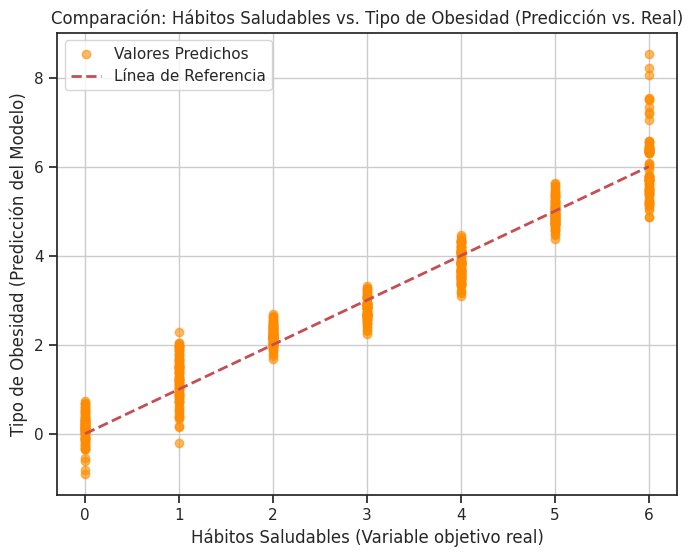

In [ ]:
import matplotlib.pyplot as plt

# Crear figura con tamaño personalizado
plt.figure(figsize=(8, 6))

# Desactivar notación científica en ejes X e Y para mejor lectura
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

# Gráfico de dispersión: valores reales (y_test) vs valores predichos (y_pred)
plt.scatter(y_test, y_pred, color='darkorange', alpha=0.6, label='Valores Predichos')

# Línea de referencia (y = x) para comparar qué tan cerca están las predicciones
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Línea de Referencia')

# Etiquetas y título del gráfico
plt.xlabel('Hábitos Saludables (Variable objetivo real)')
plt.ylabel('Tipo de Obesidad (Predicción del Modelo)')
plt.title('Comparación: Hábitos Saludables vs. Tipo de Obesidad (Predicción vs. Real)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

***¿Qué se ve en el gráfico?***

* Cada punto naranja representa una persona.  
* Su posición horizontal (eje X) indica el tipo de obesidad real según los datos.  
* Su posición vertical (eje Y) muestra el tipo de obesidad predicho por el modelo.

***Línea roja punteada:***

* Representa la línea ideal, donde el valor predicho sería exactamente igual al valor real.  
* Si un punto está sobre esta línea, el modelo hizo una predicción exacta.  
* Si un punto está alejado de la línea, el modelo cometió un error mayor.

***¿Cómo se relacionan las variables predictoras con el tipo de obesidad?***

* Cada variable (como hábitos alimenticios, actividad física, consumo de sustancias, uso de tecnología, medio de transporte, entre otros) aporta información distinta al modelo.  
* El modelo combina todas estas variables para generar una predicción final del tipo de obesidad.  
* Internamente, el modelo calcula una fórmula similar a la siguiente:

*Obesidad = a * Alimentación + b * Actividad Física + c * Fumar + d * Consumo de alcohol + e * Uso de tecnología + f * Medio de transporte + Intercepto*

***Donde:***

* a, b, c, d, e, f son los coeficientes que indican cuánto influye cada variable en la predicción.  
* El intercepto es un valor base que ajusta la salida del modelo.  
* Esta fórmula se conoce como la función hipótesis de la regresión lineal multivariable.

# ***`9. 📊 EVALUACIÓN DEL MODELO CON VALIDACIÓN CRUZADA (K-FOLD + MSE)`***

Para evaluar el desempeño del modelo de manera robusta y evitar problemas de sobreajuste, utilizamos la técnica de validación cruzada K-Fold. Este método consiste en dividir el conjunto de datos en varias particiones (folds), entrenando y evaluando el modelo en diferentes combinaciones de estos subconjuntos. De esta forma, obtenemos una estimación más confiable del error del modelo.

En este caso, empleamos el Error Cuadrático Medio (MSE) como métrica para medir la precisión de las predicciones del modelo de regresión, donde valores más bajos indican mejores resultados.


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Definir el modelo de regresión lineal
modelo = LinearRegression()

# Configurar validación cruzada con 5 particiones (KFold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir la métrica de evaluación: MSE (Error Cuadrático Medio)
# Se usa make_scorer para que sea compatible con cross_val_score
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Ejecutar validación cruzada con el modelo, los datos y la métrica definida
resultados = cross_val_score(modelo, X, y, cv=cv, scoring=mse_scorer)

# Imprimir los errores (MSE) de cada fold y el promedio general
print("Errores (MSE) por fold:", -resultados)
print("Promedio de MSE:", -np.mean(resultados))

NameError: name 'X' is not defined

# ***`10. 🌳 CLASIFICACIÓN CON ÁRBOL DE DECISIÓN: ENTRENAMIENTO Y EVALUACIÓN`***

Dado que la variable objetivo 'Obesidad' representa categorías (tipos de obesidad), es necesario aplicar un modelo de clasificación. A continuación, se muestra un ejemplo de cómo implementar un modelo de Árbol de Decisión para predecir esta variable.

In [ ]:
# Seleccionamos las variables predictoras (X) y la variable objetivo (y)
# X incluye variables numéricas y categóricas ya codificadas
# y corresponde al tipo de obesidad codificado de forma ordinal

X = df[['Edad', 'Altura', 'Peso', 'Historial_sobrepeso', 'Consumo_calorias_altas',
 'Consumo_verduras', 'Numero_comidas_principales', 'Fuma',
 'Consumo_agua_diario', 'Frecuencia_actividad_fisica',
 'Tiempo_uso_tecnologia', 'Frecuencia_consumo_alcohol',
 'Medio_transporte_habitual', 'Genero_Femenino', 'Genero_Masculino']]

y = df['Obesidad']

In [ ]:
# 1. División de datos en entrenamiento (70%) y prueba (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Entrenamiento del modelo usando Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Predicción con el conjunto de prueba y evaluación del modelo
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

# 4. Mostrar resultados: exactitud (accuracy) y métricas detalladas
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9353312302839116
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        86
           1       0.90      0.84      0.87        93
           2       0.87      0.91      0.89        88
           3       0.94      0.96      0.95        79
           4       0.96      0.94      0.95       102
           5       0.94      0.97      0.96        88
           6       1.00      0.99      0.99        98

    accuracy                           0.94       634
   macro avg       0.93      0.94      0.93       634
weighted avg       0.94      0.94      0.94       634



**`Análisis del rendimiento del modelo de Árbol de Decisión`**

***Precisión general (Accuracy):***

*   El modelo alcanzó una precisión del 93.5%, lo que indica que clasifica correctamente la gran mayoría de los casos en el conjunto de prueba.

***Métricas por clase:***

*   El reporte muestra las métricas de precisión, recall y F1-score para cada categoría de obesidad (etiquetadas del 0 al 6):
*   Todas las clases presentan valores altos en precisión, recall y F1-score, en general superiores al 85%.
*   Las clases 3, 4, 5 y 6 tienen métricas especialmente altas (por encima del 94%), lo que indica que el modelo identifica muy bien esos niveles de obesidad.
*   La clase 6 (la más alta) tiene prácticamente una precisión y recall perfectas (cercanas al 100%), lo que muestra que el modelo es muy eficaz para detectar esta categoría.


***Interpretación:***

Estos resultados sugieren que el modelo de Árbol de Decisión está bien entrenado y generaliza adecuadamente, logrando distinguir entre los distintos niveles de obesidad con alta confianza.